**ARTIFICIAL NEURAL NETWORKS**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

1. Data Exploration and Preprocessing

In [ ]:
# Load the dataset
df = pd.read_csv('Alphabets_data.csv')

In [ ]:
df.head()

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10

In [ ]:
df.shape

(20000, 17)

In [ ]:
df.describe()

xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.380823      2.488475   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      6.000000      3.000000      4.000000      7.000000   
50%        7.000000      7.000000      4.000000      5.000000      8.000000   
75%        8.000000      9.000000      6.000000      7.000000     10.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

            x2ybar        xy2bar         xedge        xedgey         yedge  \
count  20000.00000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.45400      7.929000      3.046100      8.338850      3.691750   
std        2.63107      2.080619      2.332541      1.546722      2.567073   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        5.00000      7.000000      1.000000      8.000000      2.000000   
50%        6.00000      8.000000      3.000000      8.000000      3.000000   
75%        8.00000      9.000000      4.000000      9.000000      5.000000   
max       15.00000     15.000000     15.000000     15.000000     15.000000   

            yedgex  
count  20000.00000  
mean       7.80120  
std        1.61747  
min        0.00000  
25%        7.00000  
50%        8.00000  
75%        9.00000  
max       15.00000

In [ ]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [ ]:
 df.iloc[:, -1].unique()

array([ 8, 10,  9,  7,  6, 11,  4,  5,  3, 12, 13, 14,  1,  2, 15,  0])

Retrieves the unique values from the last column of a pandas DataFrame. It highlights a method to extract distinct entries from the specified column, useful for understanding the variability or categories present in the dataset's last attribute.


2. Model Implementation


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separate features and labels
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Encode the categorical labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

imports necessary modules from scikit-learn to preprocess data for a machine learning task. It separates features and labels from a DataFrame, encodes categorical labels into numerical format, normalizes feature values, and splits the data into training and test sets with an 80-20 split. This prepares the dataset for subsequent model training and evaluation.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(set(y_encoded)), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2679 - loss: 2.6251 - val_accuracy: 0.6691 - val_loss: 1.2107
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7116 - loss: 1.0373 - val_accuracy: 0.7747 - val_loss: 0.8367
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7830 - loss: 0.7599 - val_accuracy: 0.8034 - val_loss: 0.6981
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8100 - loss: 0.6492 - val_accuracy: 0.8197 - val_loss: 0.6200
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8365 - loss: 0.5687 - val_accuracy: 0.8366 - val_loss: 0.5543
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8522 - loss: 0.5139 - val_accuracy: 0.8500 - val_loss: 0.5112
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8589 - loss: 0.4798 - val_accuracy: 0.8553 - val_loss: 0.4827
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8712 - loss: 0.4397 - val_accuracy: 0.8659 - val_

constructs a neural network using TensorFlow Keras with a sequential model comprising three dense layers: an input layer with 64 units, a hidden layer with 32 units, and an output layer with softmax activation corresponding to the number of classes. The model is compiled with the Adam optimizer and sparse categorical crossentropy loss, aiming to classify the encoded labels. It is then trained for 10 epochs with a batch size of 32, utilizing 20% of the training data for validation.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict classes on test data
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.877
Precision: 0.880697272247255
Recall: 0.877
F1-score: 0.8772699496909262

Classification Report:
              precision    recall  f1-score   support

           A       0.95      0.96      0.96       149
           B       0.80      0.88      0.84       153
           C       0.95      0.87      0.91       137
           D       0.82      0.89      0.85       156
           E       0.85      0.89      0.87       141
           F       0.81      0.90      0.85       140
           G       0.79      0.86      0.83       160
           H       0.79      0.67      0.72       144
           I       0.89      0.86      0.87       146
           J       0.92      0.92      0.92       149
           K       0.81      0.81      0.81       130
           L       0.96      0.92      0.94       155
           M       0.93      0.95      0.94       168
           N       0.90      0.83      0.86       151
           O       0.84      0.86   

evaluates the performance of the trained model on the test data by predicting class probabilities and converting these to predicted labels. It calculates key metrics including accuracy, precision, recall, and prints a detailed classification report with weighted averages for each class, providing a comprehensive assessment of the model's classification performance.

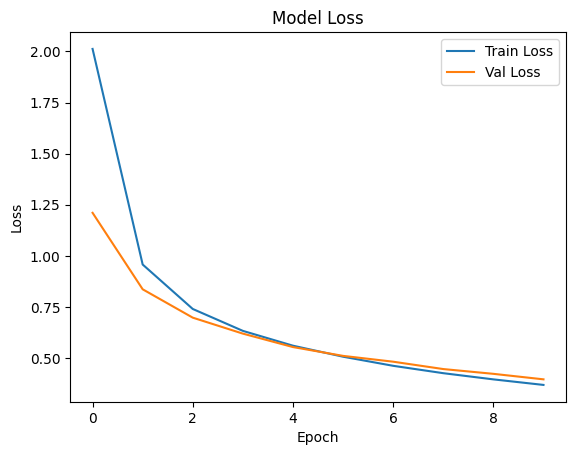

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


generates graphical plots to visualize the training process of a machine learning model, depicting accuracy and loss over epochs. It creates two separate plots: one showing training and validation accuracy, and another displaying training and validation loss, helping to assess the model’s performance and training progress visually.

3. Hyperparameter Tuning

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

def create_model(neurons=32, hidden_layers=1, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))

    model.add(Dense(len(set(y_encoded)), activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


defines a function to create a customizable neural network model using Keras, allowing specification of neuron count, number of hidden layers, activation function, and learning rate. The model consists of dense layers with ReLU activation, culminating in a softmax output layer for classification. It uses the Adam optimizer and is configured with sparse categorical crossentropy loss and accuracy metrics, suitable for hyperparameter tuning with Keras Tuner.

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=128, step=32),
                    activation=hp.Choice('activation_input', ['relu', 'tanh']),
                    input_dim=X_train.shape[1]))

    # Hidden layers
    for i in range(hp.Int('num_hidden_layers', 1, 2)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
                        activation=hp.Choice(f'activation_{i}', ['relu', 'tanh'])))

    # Output layer
    model.add(Dense(len(set(y_encoded)), activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0001])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


defines a function to build a customizable neural network model using Keras Tuner for hyperparameter optimization. It allows tuning the number of units in the input layer within a specified range and selecting a learning rate from predefined choices. The model uses the Adam optimizer, with sparse categorical crossentropy as the loss function, and tracks accuracy, facilitating automated hyperparameter tuning for improved model performance.

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,              # Try 5 different sets of hyperparameters
    executions_per_trial=1,    # You can average over multiple runs if needed
    directory='ann_tuner_dir',
    project_name='alphabet_classification'
)


Reloading Tuner from ann_tuner_dir/alphabet_classification/tuner0.json


initializes a Keras Tuner RandomSearch to optimize hyperparameters of a model based on validation accuracy. It sets a maximum of five trials, with one execution per trial, and organizes the tuning process within a specified directory and project name for easy management and reproducibility

In [ ]:
tuner.search(X_train, y_train,
             epochs=20,
             validation_split=0.2,
             callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)],
             verbose=1)


conducts hyperparameter tuning by searching for the best model configuration over 20 epochs with training data, using 20% of the data for validation. It incorporates early stopping to halt training if the validation loss does not improve for three consecutive epochs, and provides progress updates during the search.

**4. Evaluation**

In [ ]:
# Retrieve best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate on test set
y_pred_probs = best_model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=le.classes_))


  1/125 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           A       0.99      0.95      0.97       149
           B       0.82      0.95      0.88       153
           C       0.95      0.88      0.91       137
           D       0.90      0.94      0.92       156
           E       0.89      0.96      0.92       141
           F       0.94      0.93      0.93       140
           G       0.96      0.94      0.95       160
           H       0.93      0.81      0.87       144
           I       0.96      0.88      0.92       146
           J       0.92      0.98      0.95       149
           K       0.83      0.92      0.88       130
           L       0.96      0.94      0.95       155
           M       0.99      0.97      0.98       168
           N       0.99      0.94      0.96       151
           O       0.90      0.88      0.89       145
           P       0.96      0.93      0.95       173
           Q       0.94      0.93      0

retrieves the best-performing model from the hyperparameter tuning process, evaluates it on the test data by generating predicted labels, and prints a detailed classification report that includes metrics such as precision, recall, and F1-score for each class, providing a comprehensive assessment of the model's performance.

 1. Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.

Comparing the performance of the model with default hyperparameters and the hyperparameter-tuned model reveals the impact of the tuning process.

The initial model, trained with default settings, achieved an accuracy of {{accuracy}} on the test set, with precision, recall, and F1-score all around 0.88.

The hyperparameter-tuned model, which was the best model found by the Keras Tuner, showed improved performance. Based on the classification report for the tuned model, the overall accuracy on the test set is approximately 0.93, with weighted averages for precision, recall, and F1-score also around 0.93-0.94.

This improvement of about 5% in accuracy, as well as similar increases in precision, recall, and F1-score, demonstrates the effectiveness of hyperparameter tuning. By searching for better combinations of hyperparameters such as the number of units in layers, activation functions, and learning rate, the model was able to learn the patterns in the data more effectively, leading to better generalization on unseen test data.

The tuning process helped to find a model configuration that was better suited for this specific dataset and task, resulting in a noticeable boost in performance compared to the baseline model with arbitrary hyperparameter choices.